In [1]:
import pandas as pd
import requests
import time

data = []
start = 1   # starting rank
total_records = 1200  # how many you want

headers = {
    "User-Agent": "Mozilla/5.0"
}

while start <= total_records:
    print(f"Fetching coins {start} to {start+limit-1}...")

   # url = f"https://api.coinmarketcap.com/data-api/v3/cryptocurrency/listing?start={start}&limit={limit}&sortBy=market_cap&sortType=desc&cryptoType=all&tagType=all&audited=false"
    url = f"https://api.coinmarketcap.com/data-api/v3/airdrop/events/query"
    r = requests.get(url, headers=headers)
    if r.status_code != 200:
        print("Request failed:", r.status_code)
        break

    result = r.json()
    coins = result.get("data", {}).get("cryptoCurrencyList", [])
    if not coins:
        break

    for c in coins:
        item = {
            "Name": c.get("name"),
            "Symbol": c.get("symbol"),
            "Price": c.get("quotes", [{}])[0].get("price"),
            "Market Cap": c.get("quotes", [{}])[0].get("marketCap"),
            "24h Change (%)": c.get("quotes", [{}])[0].get("percentChange24h"),
            "7d Change (%)": c.get("quotes", [{}])[0].get("percentChange7d"),
            "Volume 24h": c.get("quotes", [{}])[0].get("volume24h"),
            "Circulating Supply": c.get("circulatingSupply")
        }
        data.append(item)

    start += limit
    time.sleep(1)  # polite delay

# Save to CSV
df = pd.DataFrame(data)
df.to_csv("coinmarketcap_pagination.csv", index=False, encoding="utf-8-sig")

print("Total Records Scraped:", len(df))


Fetching coins 1 to 100...
Request failed: 405
Total Records Scraped: 0


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
path = pd.read_csv(r"D:\Innomatics\Webscraping\coinmarketcap_pagination.xls")

In [9]:
path

,Name,Symbol,Price,Market Cap,24h Change (%),7d Change (%),Volume 24h,Circulating Supply
0,Bitcoin,BTC,112342.690531,2.237472e+12,1.274604,2.057478,4.785771e+10,1.991649e+07
1,Ethereum,ETH,4418.606321,5.333488e+11,0.028446,1.749863,3.626620e+10,1.207052e+08
2,XRP,XRP,2.845007,1.692274e+11,-0.060390,-1.052339,5.004582e+09,5.948226e+10
3,Tether USDt,USDT,1.000161,1.685677e+11,-0.011607,0.010898,1.067136e+11,1.685405e+11
4,BNB,BNB,850.259470,1.183456e+11,0.140122,-0.626665,1.843423e+09,1.391876e+08
...,...,...,...,...,...,...,...,...
1195,Skate,SKATE,0.041013,8.748253e+06,1.780715,-1.327153,2.705730e+06,2.133053e+08
1196,Atletico De Madrid Fan Token,ATM,1.249740,8.747688e+06,-1.108735,-3.054311,3.808889e+06,6.999607e+06
1197,SIGMA,SIGMA,0.009716,8.743341e+06,0.350928,-8.464239,1.126987e+06,8.998492e+08
1198,Dragonchain,DRGN,0.023507,8.715613e+06,-8.887201,-4.276849,2.064680e+04,3.707727e+08


In [10]:
df = pd.DataFrame(path)

In [11]:
df

,Name,Symbol,Price,Market Cap,24h Change (%),7d Change (%),Volume 24h,Circulating Supply
0,Bitcoin,BTC,112342.690531,2.237472e+12,1.274604,2.057478,4.785771e+10,1.991649e+07
1,Ethereum,ETH,4418.606321,5.333488e+11,0.028446,1.749863,3.626620e+10,1.207052e+08
2,XRP,XRP,2.845007,1.692274e+11,-0.060390,-1.052339,5.004582e+09,5.948226e+10
3,Tether USDt,USDT,1.000161,1.685677e+11,-0.011607,0.010898,1.067136e+11,1.685405e+11
4,BNB,BNB,850.259470,1.183456e+11,0.140122,-0.626665,1.843423e+09,1.391876e+08
...,...,...,...,...,...,...,...,...
1195,Skate,SKATE,0.041013,8.748253e+06,1.780715,-1.327153,2.705730e+06,2.133053e+08
1196,Atletico De Madrid Fan Token,ATM,1.249740,8.747688e+06,-1.108735,-3.054311,3.808889e+06,6.999607e+06
1197,SIGMA,SIGMA,0.009716,8.743341e+06,0.350928,-8.464239,1.126987e+06,8.998492e+08
1198,Dragonchain,DRGN,0.023507,8.715613e+06,-8.887201,-4.276849,2.064680e+04,3.707727e+08


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                1200 non-null   object 
 1   Symbol              1200 non-null   object 
 2   Price               1200 non-null   float64
 3   Market Cap          1200 non-null   float64
 4   24h Change (%)      1200 non-null   float64
 5   7d Change (%)       1200 non-null   float64
 6   Volume 24h          1200 non-null   float64
 7   Circulating Supply  1200 non-null   float64
dtypes: float64(6), object(2)
memory usage: 75.1+ KB


In [13]:
df.shape

(1200, 8)

In [7]:
df.head(10)

,Name,Symbol,Price,Market Cap,24h Change (%),7d Change (%),Volume 24h,Circulating Supply
0,Bitcoin,BTC,112342.690531,2.237472e+12,1.274604,2.057478,4.785771e+10,1.991649e+07
1,Ethereum,ETH,4418.606321,5.333488e+11,0.028446,1.749863,3.626620e+10,1.207052e+08
2,XRP,XRP,2.845007,1.692274e+11,-0.060390,-1.052339,5.004582e+09,5.948226e+10
3,Tether USDt,USDT,1.000161,1.685677e+11,-0.011607,0.010898,1.067136e+11,1.685405e+11
4,BNB,BNB,850.259470,1.183456e+11,0.140122,-0.626665,1.843423e+09,1.391876e+08
5,Solana,SOL,206.895450,1.119634e+11,-0.395267,-0.650244,5.913079e+09,5.411591e+08
6,USDC,USDC,0.999903,7.256917e+10,-0.006009,-0.001801,1.334683e+10,7.257622e+10
7,Dogecoin,DOGE,0.216690,3.267989e+10,0.236567,0.771902,1.594433e+09,1.508140e+11
8,TRON,TRX,0.337177,3.191753e+10,-0.567670,-0.326885,8.783541e+08,9.466101e+10
9,Cardano,ADA,0.829808,2.965810e+10,1.149806,0.646927,8.598985e+08,3.574093e+10


In [8]:
df.tail()

,Name,Symbol,Price,Market Cap,24h Change (%),7d Change (%),Volume 24h,Circulating Supply
1195,Skate,SKATE,0.041013,8.748253e+06,1.780715,-1.327153,2.705730e+06,2.133053e+08
1196,Atletico De Madrid Fan Token,ATM,1.249740,8.747688e+06,-1.108735,-3.054311,3.808889e+06,6.999607e+06
1197,SIGMA,SIGMA,0.009716,8.743341e+06,0.350928,-8.464239,1.126987e+06,8.998492e+08
1198,Dragonchain,DRGN,0.023507,8.715613e+06,-8.887201,-4.276849,2.064680e+04,3.707727e+08
1199,SwissCheese,SWCH,0.197706,8.649420e+06,-0.072237,-1.474302,3.411759e+06,4.374880e+07


In [9]:
df.describe(include = "all")

,Name,Symbol,Price,Market Cap,24h Change (%),7d Change (%),Volume 24h,Circulating Supply
count,1200,1200,1.200000e+03,1.200000e+03,1200.000000,1200.000000,1.200000e+03,1.200000e+03
unique,1198,1177,NaN,NaN,NaN,NaN,NaN,NaN
top,Yala,RZR,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,2,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1.205056e+02,3.248246e+09,0.985821,-0.171486,2.121037e+08,1.094171e+19
std,NaN,NaN,3.257632e+03,6.693566e+10,7.507142,20.390546,3.564396e+09,3.790187e+20
min,NaN,NaN,8.899414e-16,8.649420e+06,-32.393679,-64.259518,0.000000e+00,1.246587e+04
25%,NaN,NaN,2.022414e-02,1.944309e+07,-0.775814,-5.802640,6.537531e+05,1.333552e+08
50%,NaN,NaN,9.963961e-02,4.524696e+07,0.310845,-1.878577,4.222485e+06,6.550915e+08
75%,NaN,NaN,6.019498e-01,1.295859e+08,1.651003,0.693361,1.357759e+07,2.100491e+09


### In Pandas **`df.isnull().sum()`** is used to detect and count missing (null/NaN) values in each column of a Pandas DataFrame.

In [10]:
df.isnull().sum()

Name                  0
Symbol                0
Price                 0
Market Cap            0
24h Change (%)        0
7d Change (%)         0
Volume 24h            0
Circulating Supply    0
dtype: int64

In [11]:
df["Name"].value_counts()

Name
Yala             2
Phoenix          2
Bitcoin          1
Alien Worlds     1
Kleros           1
                ..
Bancor           1
Apertum          1
Stratis [New]    1
Constellation    1
SwissCheese      1
Name: count, Length: 1198, dtype: int64

# Descriptive statistics

## Central Tendancy

In [40]:
round(df["Price"].mean(),4)

120.5056

In [41]:
round(df["Price"].median(),4)

0.0996

In [14]:
df["Volume 24h"].mean()

212103707.2834973

In [15]:
df["Volume 24h"].median()

4222485.30283311

In [42]:
round(df["Market Cap"].mean(),4)

3248246410.1696

In [43]:
round(df["Market Cap"].median(),4)

45246960.7794

# Standard Deviation of Price

In [44]:
round(df["Price"].std(),4)

3257.6319

# Variance of Price

In [45]:
round(df["Price"].var(),4)

10612165.8906

# Range (Max – Min)
- Simplest measure of spread.

- Sensitive to outliers.

In [20]:
round(df["Price"].max(),2)

112342.6905307702

In [48]:
df["Price"].min()

8.89941401e-16

In [22]:
df["Price"].max() - df["Price"].min()

112342.6905307702

# Quartiles (Q1, Q2, Q3)

- Split data into 4 equal parts.

- Q1 = 25th percentile, Q2 = Median, Q3 = 75th percentile.

In [23]:
df["Price"].quantile([0.25, 0.5, 0.75])

0.25    0.020224
0.50    0.099640
0.75    0.601950
Name: Price, dtype: float64

# Interquartile Range (IQR)

 Interquartile Range (IQR)

- Spread of the middle 50% of data.

- Less sensitive to outliers.


In [24]:
Q1 = df["Price"].quantile(0.25)
Q3 = df["Price"].quantile(0.75)
IQR = Q3 - Q1
IQR

0.5817256375363037

1. Skewness

- Measures asymmetry of the distribution.

- Skewness > 0 → right-skewed (long right tail, e.g., most cryptos have low prices but a few have very high).

- Skewness < 0 → left-skewed (long left tail).

- Skewness ≈ 0 → symmetric like normal distribution.

In [25]:
df["Price"].skew()

34.16597648148972

In [26]:
df["Market Cap"].skew()

31.517095148805716

2. Kurtosis

- Measures peakedness / tail heaviness.

- Kurtosis > 3 → leptokurtic (heavy tails, more outliers than normal).

- Kurtosis < 3 → platykurtic (light tails, flatter than normal).

- Kurtosis ≈ 3 → mesokurtic (normal-like).

In [27]:
df["Price"].kurt()

1177.4971193263486

In [28]:
df["Market Cap"].kurt()

1040.8390122811143

3. Histograms

- Visual representation of distribution.

- Useful to see skewness and spread.

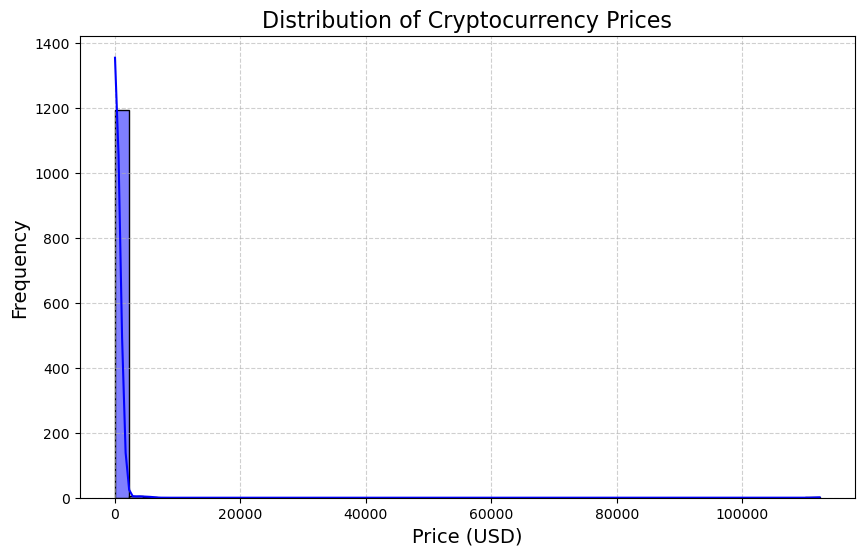

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram + KDE distribution plot for Price
plt.figure(figsize=(10,6))
sns.histplot(df["Price"], bins=50, kde=True, color="blue", edgecolor="black")

plt.title("Distribution of Cryptocurrency Prices", fontsize=16)
plt.xlabel("Price (USD)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


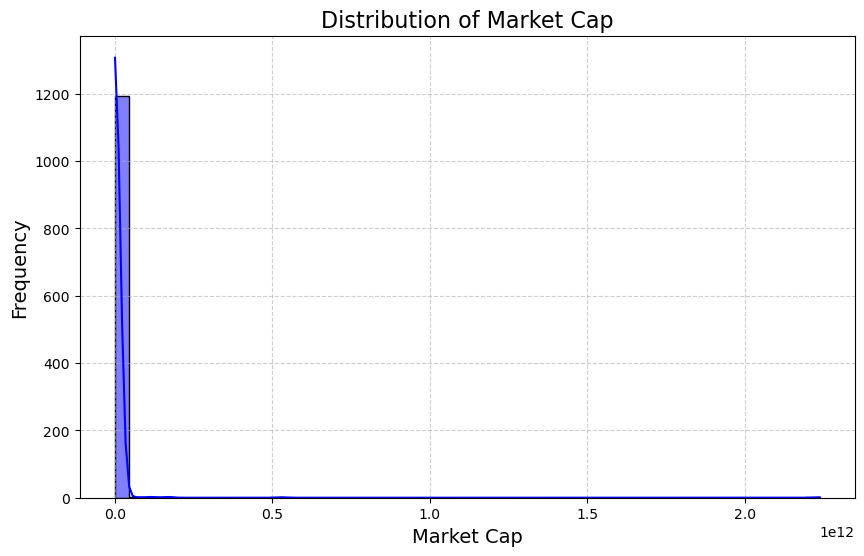

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram + KDE distribution plot for Price
plt.figure(figsize=(10,6))
sns.histplot(df["Market Cap"], bins=50, kde=True, color="blue", edgecolor="black")

plt.title("Distribution of Market Cap", fontsize=16)
plt.xlabel("Market Cap", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


1. Top 10 Cryptocurrencies by Market Cap

In [31]:
top10 = df.sort_values(by="Market Cap", ascending=False).head(10)
print(top10[["Name", "Market Cap"]])


          Name    Market Cap
0      Bitcoin  2.237472e+12
1     Ethereum  5.333488e+11
2          XRP  1.692274e+11
3  Tether USDt  1.685677e+11
4          BNB  1.183456e+11
5       Solana  1.119634e+11
6         USDC  7.256917e+10
7     Dogecoin  3.267989e+10
8         TRON  3.191753e+10
9      Cardano  2.965810e+10


# Proportion Analysis

1. Bitcoin & Ethereum % of Total Market Cap

In [32]:
total_cap = df["Market Cap"].sum()

btc_cap = df.loc[df["Name"] == "Bitcoin", "Market Cap"].values[0]
eth_cap = df.loc[df["Name"] == "Ethereum", "Market Cap"].values[0]

btc_share = (btc_cap / total_cap) * 100
eth_share = (eth_cap / total_cap) * 100
print(f"Bitcoin Share : {btc_share}") 
print(f"Ethereum Share : {eth_share}")

Bitcoin Share : 57.40204233726614
Ethereum Share : 13.682994391452723


Bitcoin: 57%

Ethereum: 13%

Rest of market: 30%

 # Visualization (Pie Chart Example)

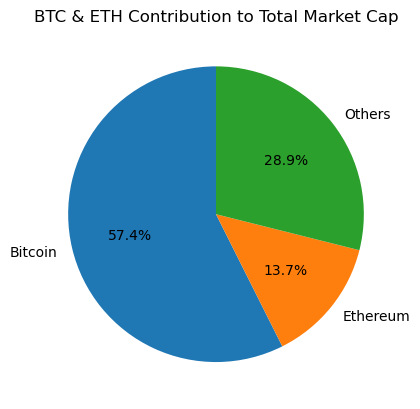

In [33]:
import matplotlib.pyplot as plt

shares = [btc_share, eth_share, 100 - (btc_share + eth_share)]
labels = ["Bitcoin", "Ethereum", "Others"]

plt.pie(shares, labels=labels, autopct="%.1f%%", startangle=90)
plt.title("BTC & ETH Contribution to Total Market Cap")
plt.show()


# Univariate Analysis

<Axes: xlabel='Price', ylabel='Count'>

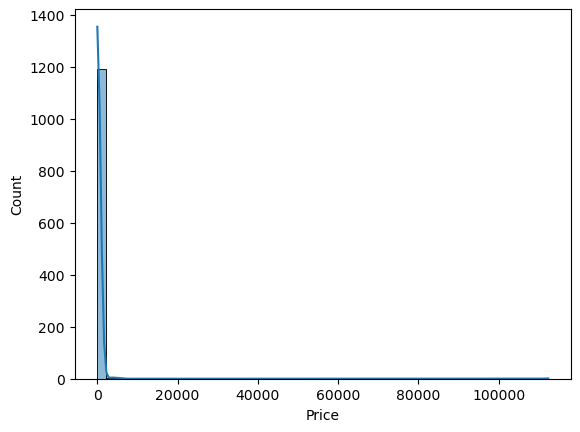

In [34]:
sns.histplot(df["Price"], bins=50, kde=True)


# Boxplot (detect outliers in MarketCap)

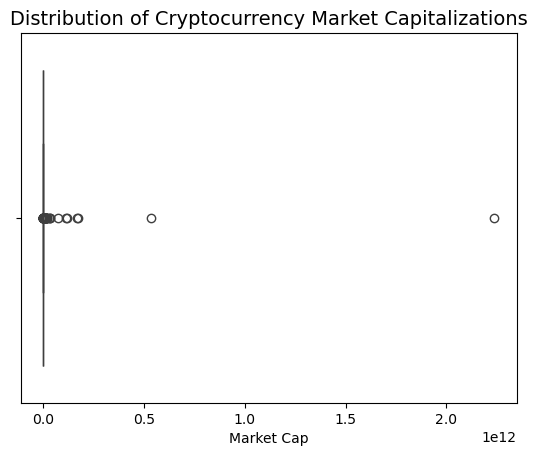

In [35]:
sns.boxplot(x=df["Market Cap"])
plt.title("Distribution of Cryptocurrency Market Capitalizations", fontsize=14)
plt.show()


# 2. Bivariate Plots (two variables together)

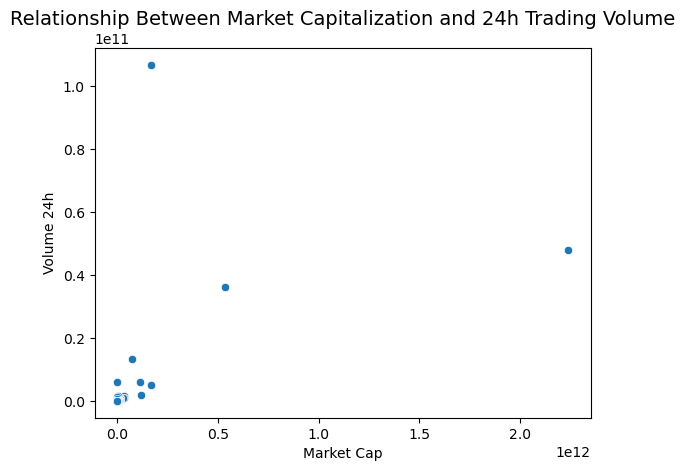

In [36]:
sns.scatterplot(x="Market Cap", y="Volume 24h", data=df)
plt.title("Relationship Between Market Capitalization and 24h Trading Volume", fontsize=14)
plt.show()


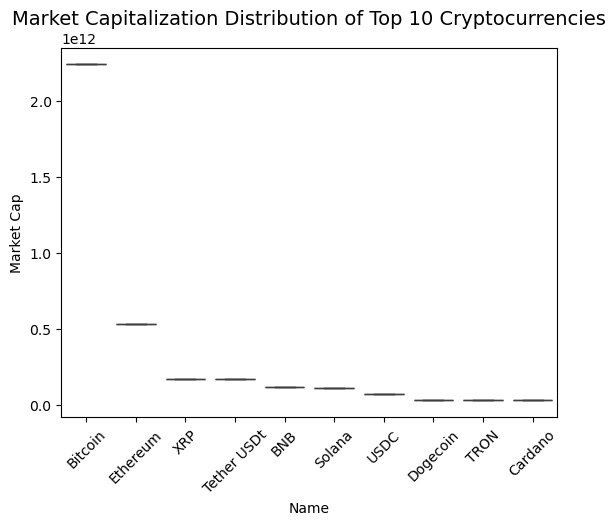

In [37]:
top10 = df.nlargest(10, "Market Cap")

sns.boxplot(x="Name", y="Market Cap", data=top10)
plt.xticks(rotation=45)
plt.title("Market Capitalization Distribution of Top 10 Cryptocurrencies", fontsize=14)
plt.show()


# Multivariate Analysis

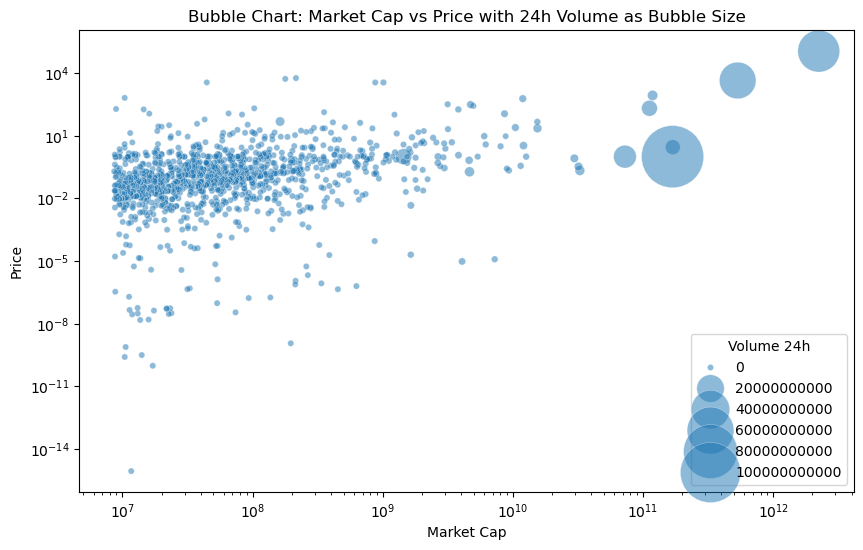

In [38]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Market Cap", y="Price", 
                size="Volume 24h", sizes=(20, 2000), 
                alpha=0.5, data=df)

plt.xscale("log")
plt.yscale("log")
plt.title("Bubble Chart: Market Cap vs Price with 24h Volume as Bubble Size")
plt.show()


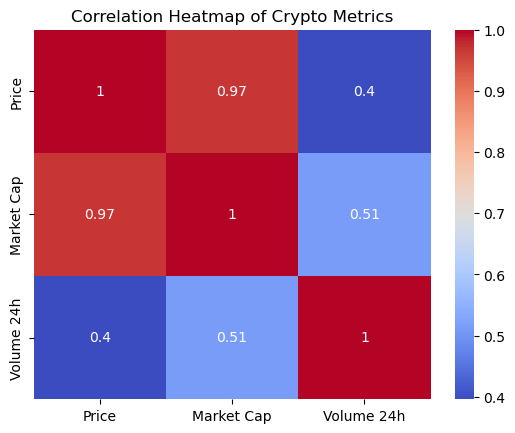

In [39]:
sns.heatmap(df[["Price", "Market Cap", "Volume 24h"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Crypto Metrics")
plt.show()